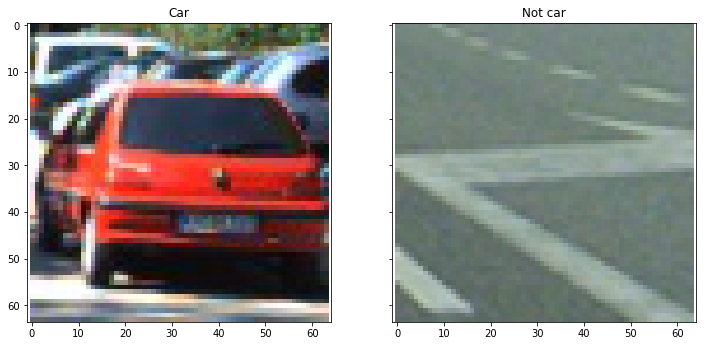

In [11]:
#CAR NOT CAR EXAMPLE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

car_img = mpimg.imread('./examples/car_example.jpg')
not_car_image = cv2.imread('./examples/not_car_example.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5), sharex=True, sharey=True)
ax1.imshow(car_img)
ax1.set_title('Car')
ax2.imshow(not_car_image)
ax2.set_title('Not car')
plt.savefig('./output_images/car_not_car2.jpg')

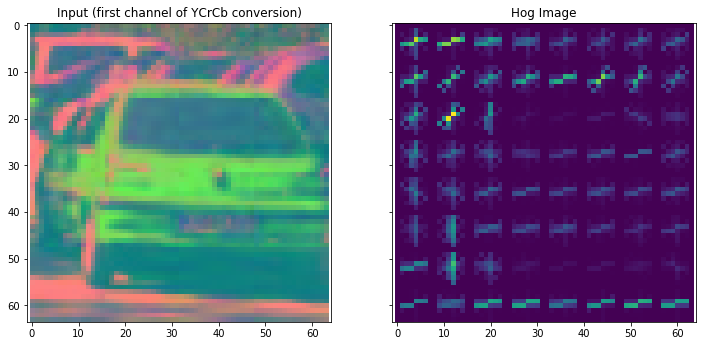

In [19]:
#Extract Hog features and plot example
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
import cv2

image = mpimg.imread('./examples/car_example.jpg')
#image = cv2.imread('./test_images/test1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

image_ch1 = image[:,:,0]

fd, hog_image = hog(image_ch1, orientations=11, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5), sharex=True, sharey=True)
ax1.imshow(image)
ax1.set_title('Input (first channel of YCrCb conversion)')
ax2.imshow(hog_image)
ax2.set_title('Hog Image')
plt.savefig('./output_images/hog_feat.jpg')

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import os
from useful_functions import *

# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
# Divide up into cars and notcars
images = glob.glob('./non-vehicles/non-vehicles/*.png')
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

dirs = os.listdir("./vehicles/vehicles/") 
print(dirs)
cars = []

for folder in dirs:
    if folder != '.DS_Store':
            
        car_images = glob.glob('./vehicles/vehicles/'+folder+'/*.png')

        for image in car_images:
        #if 'image' in image or 'extra' in image:
            cars.append(image)
        #else:
        #    cars.append(image)

test_images = glob.glob('./testset/*.png')    
test_notcars = []
test_cars = []

for image in test_images:
    if 'image' in image or 'extra' in image:
        test_notcars.append(image)
    else:
        test_cars.append(image)
    
 
print("no. of non cars examples in training set: ",len(notcars))
print("no. of car examples in training set:      ",len(cars))

print("no. of non cars examples in test set:     ",len(test_notcars))
print("no. of car examples in test set:          ",len(test_cars))

['.DS_Store', 'GTI_MiddleClose', 'GTI_Left', 'GTI_Right', 'KITTI_extracted', 'GTI_Far']
no. of non cars examples in training set:  7011
no. of car examples in training set:       6909
no. of non cars examples in test set:      1957
no. of car examples in test set:           1883


In [21]:
from sklearn.utils import shuffle
from sklearn import svm, grid_search, datasets

colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 16
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

test_car_features = extract_features(test_cars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
test_notcar_features = extract_features(test_notcars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X_train = np.vstack((car_features, notcar_features)).astype(np.float64)                        
X_test = np.vstack((test_car_features, test_notcar_features)).astype(np.float64) 

X_train = np.nan_to_num(X_train)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X_train
scaled_X_train = X_scaler.transform(X_train)
# Apply the scaler to X_test
scaled_X_test = X_scaler.transform(X_test)

# Define the labels vector
y_train = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
y_test = np.hstack((np.ones(len(test_car_features)), np.zeros(len(test_notcar_features))))

# Split up data into randomized training and test sets
X_train, y_train = shuffle(scaled_X_train, y_train)
X_test, y_test = shuffle(scaled_X_test, y_test)
print(len(X_test))

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#clf = grid_search.GridSearchCV(svr, parameters)
#clf.fit(X_train, y_train)
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))


/home/igolaso/Programs/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/igolaso/Programs/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


47.43 Seconds to extract HOG features...
3840
Using: 12 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 4464
7.8 Seconds to train SVC...
Test Accuracy of SVC =  0.9888


In [22]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 18
print('My SVC predicts:     ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:      [ 1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
For these 18 labels:  [ 1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
0.00548 Seconds to predict 18 labels with SVC


In [23]:
from sklearn.metrics import classification_report
t = time.time()
y_true, y_pred = y_test, svc.predict(X_test)
print(classification_report(y_true, y_pred))
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', len(X_test),'labels with SVC')

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1957
        1.0       0.99      0.99      0.99      1883

avg / total       0.99      0.99      0.99      3840

0.03135 Seconds to predict 3840 labels with SVC


In [ ]:
import pickle

#save svc classifier, scaler and parameters to pickle file
dist_pickle = {}
dist_pickle["svc"] = svc
dist_pickle["scaler"] = X_scaler
dist_pickle["orient"] = orient
dist_pickle["pix_per_cell"] = pix_per_cell
dist_pickle["cell_per_block"] = cell_per_block

pickle.dump( dist_pickle, open( "linear_HSV_pickle.p", "wb" ) )